<a href="https://www.kaggle.com/code/jakubwalczykowski/justjoin-it-dateset-analysis-and-correlations?scriptVersionId=122502561" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
import warnings
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/polish-it-job-board-data-from-2022/bq-results-20221120-171341-1668964430142.csv


In [2]:
df = pd.read_csv('/kaggle/input/polish-it-job-board-data-from-2022/bq-results-20221120-171341-1668964430142.csv')

## This is dataset from justjoin.it from last year, we can analysis IT job offers on polish market

## Dataset cleaning and exploration

In [3]:
df.head()

,Title,City,Country_code,Marker_icon,Workplace_type,Experience_level,Published_at,Remote_interview,Remote,Open_to_hire_Ukrainians,...,salary_from_other,salary_to_other,salary_currency_other,currency_exchange_rate,skills_name_0,skills_value_0,skills_name_1,skills_value_1,skills_name_2,skills_value_2
0,Senior Frontend Software Engineer,London,GB,javascript,remote,senior,2022-07-31T11:00:14.548Z,True,True,True,...,0,0,unknown,0.176806,React,5,TypeScript,5,unknown,0
1,Sr. Backend Engineer,Berlin,DE,java,remote,senior,2022-07-07T10:25:00.000Z,True,True,True,...,0,0,unknown,0.179577,Kotlin,3,Backend,4,Java,4
2,Sr. Backend Engineer,Katowice,PL,java,remote,senior,2022-05-31T11:32:00.000Z,True,True,True,...,0,0,unknown,0.185871,Kotlin,3,Backend,4,Java,4
3,Sr. Backend Engineer,London,GB,java,remote,senior,2022-05-25T17:06:36.442Z,True,True,True,...,0,0,unknown,0.184581,Kotlin,3,Backend,4,Java,4
4,Python Developer (4 days/week),Białystok,PL,python,remote,mid,2022-06-30T14:57:00.000Z,True,True,False,...,0,0,unknown,0.182969,Flask,3,English,4,Python,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37787 entries, 0 to 37786
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      37787 non-null  object 
 1   City                       37787 non-null  object 
 2   Country_code               37754 non-null  object 
 3   Marker_icon                37787 non-null  object 
 4   Workplace_type             37787 non-null  object 
 5   Experience_level           37787 non-null  object 
 6   Published_at               37787 non-null  object 
 7   Remote_interview           37787 non-null  bool   
 8   Remote                     37787 non-null  bool   
 9   Open_to_hire_Ukrainians    32585 non-null  object 
 10  Company_size_from          37732 non-null  object 
 11  Company_size_to            37748 non-null  object 
 12  if_permanent               37787 non-null  bool   
 13  salary_from_permanent      37787 non-null  flo

There are sam random inputs in 'Company_size_from' lets get rid of those

In [5]:
df['Company_size_from']=df['Company_size_from'].replace({'Oct': '1'})
df['Company_size_from']=df['Company_size_from'].replace({'Nov': '1'})
df['Company_size_from']=df['Company_size_from'].replace({'May': '1'})
df['Company_size_from']=df['Company_size_from'].replace({'Jan': '1'})
df['Company_size_from']=df['Company_size_from'].replace({'Jun': '1'})
df['Company_size_from']=df['Company_size_from'].replace({'Aug': '1'})
df['Company_size_from']=df['Company_size_from'].replace({'01': '1'})
df['Company_size_from']=df['Company_size_from'].replace({'02': '2'})
df['Company_size_from']=df['Company_size_from'].replace({'03': '3'})
df['Company_size_from']=df['Company_size_from'].replace({'05': '5'})
df['Company_size_from']=df['Company_size_from'].replace({'06': '6'})
df['Company_size_from']=df['Company_size_from'].replace({'08': '8'})
df['Company_size_from']=df['Company_size_from'].replace({'0.0': '1'})
df['Company_size_from']=df['Company_size_from'].replace({'0': '1'})

In [6]:
df['Company_size_from'] = df['Company_size_from'].astype(str)
df['Company_size_from']=df['Company_size_from'].str.strip(".0")
df.Company_size_from=pd.to_numeric(df.Company_size_from, errors="coerce")
df['Company_size_from'].astype(float)

0        25.0
1         2.0
2         2.0
3         2.0
4         1.0
         ... 
37782    43.0
37783    43.0
37784    43.0
37785    23.0
37786    43.0
Name: Company_size_from, Length: 37787, dtype: float64

From march there is another boolean column, I will fill nan with False for time before march.

In [7]:
df.Open_to_hire_Ukrainians = df.Open_to_hire_Ukrainians.fillna(False)

## Feature engenering and data visualization

In [8]:
def size(x):
    if x < 50:
        return 0
    elif x >= 51 and x < 100:
        return 1
        33367.25
    elif x >= 101 and x < 500:
        return 2
    elif x >= 501 and x < 1000:
        return 3    
    else:
        return 4
df['Company_size_from']=df['Company_size_from'].apply(size)
df['Company_size_from'].value_counts()

0    34987
1     1374
4      859
2      304
3      263
Name: Company_size_from, dtype: int64

In [9]:
df[['Date','Time']] = df.Published_at.str.split("T",expand=True,)
df['Date'] = pd.to_datetime(df['Date'].str.strip(), format='%Y/%m/%d')
df['Week_Number'] = df['Date'].dt.isocalendar().week

In [10]:
df['permanent_mean'] = df[['salary_from_permanent', 'salary_to_permanent']].mean(axis=1)*df['currency_exchange_rate']
df['b2b_mean'] = df[['salary_from_b2b', 'salary_to_b2b']].mean(axis=1)*df['currency_exchange_rate']
df['mandate_mean'] = df[['salary_from_mandate', 'salary_to_mandate']].mean(axis=1)*df['currency_exchange_rate']

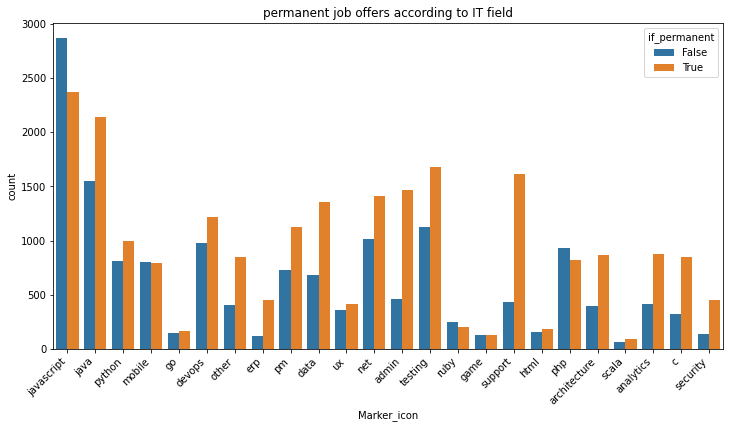

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='Marker_icon',hue='if_permanent', ax=ax).set(title='permanent job offers according to IT field')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

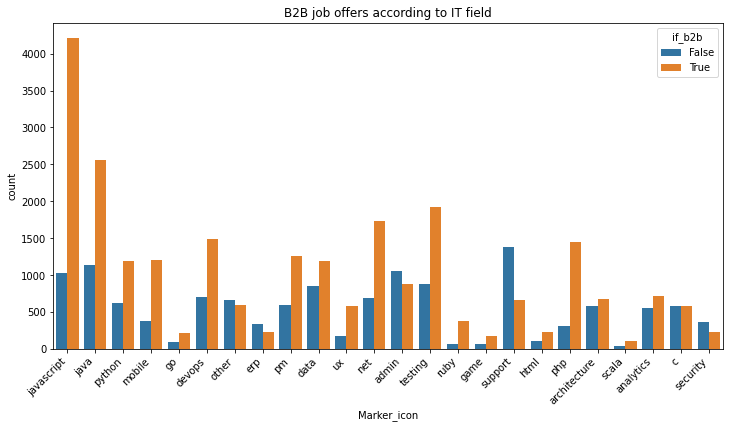

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='Marker_icon',hue='if_b2b', ax=ax).set(title='B2B job offers according to IT field')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

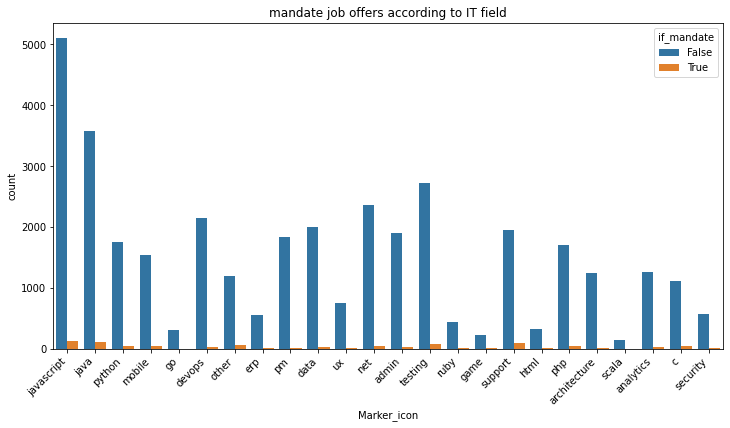

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='Marker_icon',hue='if_mandate', ax=ax).set(title='mandate job offers according to IT field')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Most of offers has undisclosed salary, so if we want to compare salaries we need to drop 0 values

Text(0.5, 1.0, 'mandate_mean_salary')

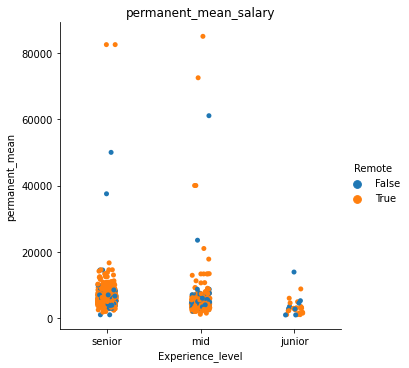

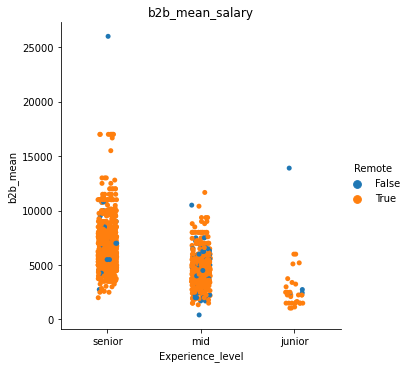

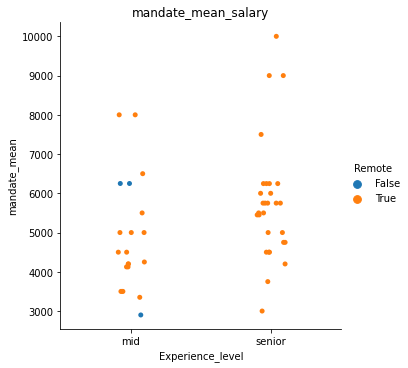

In [14]:
df1, df2, df3 = df.loc[df['permanent_mean'] != 0 ] , df.loc[df['b2b_mean'] != 0 ], df.loc[df['mandate_mean'] !=0 ]

lm = sns.catplot(x='Experience_level', y ='permanent_mean',hue='Remote',data=df1)
ax1 =lm.axes
ax1=plt.gca()
ax1.set_title('permanent_mean_salary')
lm_2 = sns.catplot(x='Experience_level', y ='b2b_mean',hue='Remote',data=df2)
ax2 =lm_2.axes
ax2=plt.gca()
ax2.set_title('b2b_mean_salary')
lm_3 = sns.catplot(x='Experience_level', y ='mandate_mean',hue='Remote',data=df3)
ax3 =lm_3.axes
ax3=plt.gca()
ax3.set_title('mandate_mean_salary')

Comparing salaries in 5 main cities with split for two main forms of employment.

Text(0.5, 1.0, 'permanent_mean_salary_in_Poznan')

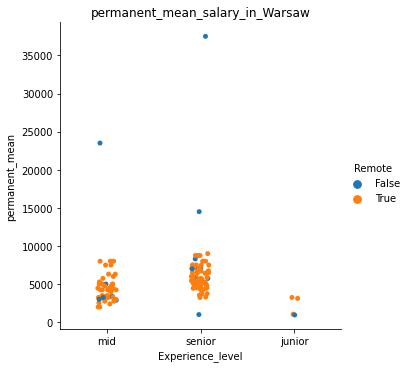

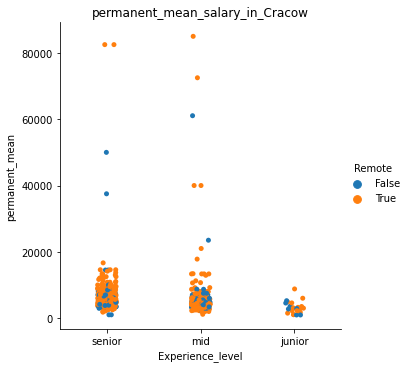

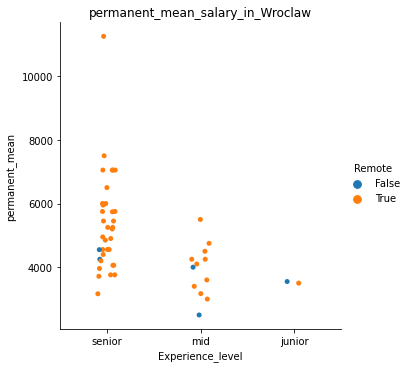

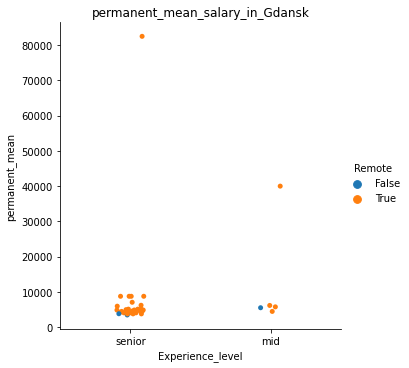

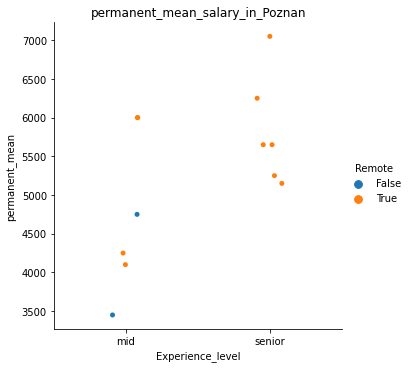

In [15]:
df4, df5, df6, df7, df8 = df1.loc[df1['City'] == 'Warszawa' ] , df1.loc[df1['City'] != 'Kraków' ], df1.loc[df1['City'] == 'Wrocław' ], df1.loc[df1['City'] == 'Gdańsk' ], df1.loc[df1['City'] == 'Poznań' ]

lm = sns.catplot(x='Experience_level', y ='permanent_mean',hue='Remote',data=df4)
ax1 =lm.axes
ax1=plt.gca()
ax1.set_title('permanent_mean_salary_in_Warsaw')
lm_2 = sns.catplot(x='Experience_level', y ='permanent_mean',hue='Remote',data=df5)
ax2 =lm_2.axes
ax2=plt.gca()
ax2.set_title('permanent_mean_salary_in_Cracow')
lm_3 = sns.catplot(x='Experience_level', y ='permanent_mean',hue='Remote',data=df6)
ax3 =lm_3.axes
ax3=plt.gca()
ax3.set_title('permanent_mean_salary_in_Wroclaw')
lm4 = sns.catplot(x='Experience_level', y ='permanent_mean',hue='Remote',data=df7)
ax4 =lm.axes
ax4=plt.gca()
ax4.set_title('permanent_mean_salary_in_Gdansk')
lm5 = sns.catplot(x='Experience_level', y ='permanent_mean',hue='Remote',data=df8)
ax5 =lm.axes
ax5=plt.gca()
ax5.set_title('permanent_mean_salary_in_Poznan')


Text(0.5, 1.0, 'b2b_mean_salary_in_Poznan')

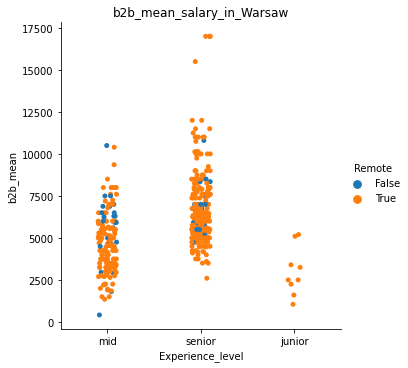

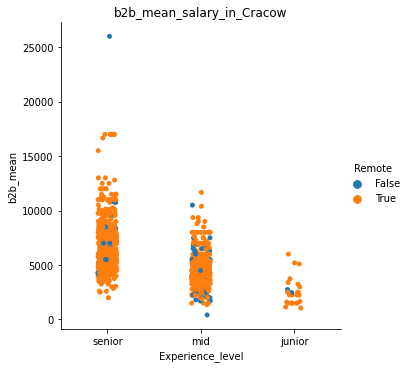

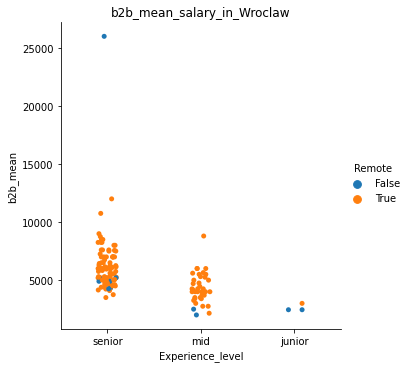

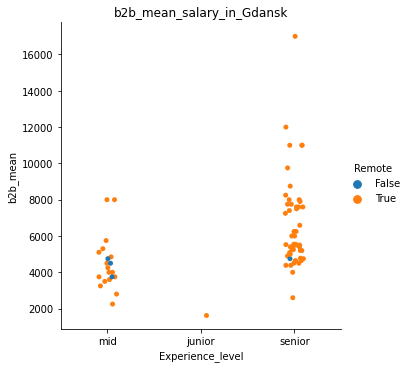

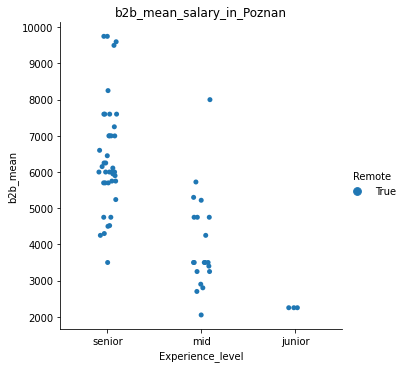

In [16]:
df9, df10, df11, df12, df13 = df2.loc[df2['City'] == 'Warszawa' ] , df2.loc[df2['City'] != 'Kraków' ], df2.loc[df2['City'] == 'Wrocław' ], df2.loc[df2['City'] == 'Gdańsk' ], df2.loc[df2['City'] == 'Poznań' ]
lm = sns.catplot(x='Experience_level', y ='b2b_mean',hue='Remote',data=df9)
ax1 =lm.axes
ax1=plt.gca()
ax1.set_title('b2b_mean_salary_in_Warsaw')
lm_2 = sns.catplot(x='Experience_level', y ='b2b_mean',hue='Remote',data=df10)
ax2 =lm_2.axes
ax2=plt.gca()
ax2.set_title('b2b_mean_salary_in_Cracow')
lm_3 = sns.catplot(x='Experience_level', y ='b2b_mean',hue='Remote',data=df11)
ax3 =lm_3.axes
ax3=plt.gca()
ax3.set_title('b2b_mean_salary_in_Wroclaw')
lm4 = sns.catplot(x='Experience_level', y ='b2b_mean',hue='Remote',data=df12)
ax4 =lm.axes
ax4=plt.gca()
ax4.set_title('b2b_mean_salary_in_Gdansk')
lm5 = sns.catplot(x='Experience_level', y ='b2b_mean',hue='Remote',data=df13)
ax5 =lm.axes
ax5=plt.gca()
ax5.set_title('b2b_mean_salary_in_Poznan')

New column added after russian invasion to Ukraine

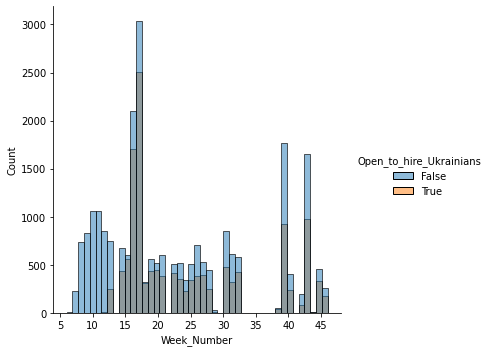

In [17]:
sns.displot(data = df,x = 'Week_Number', hue ='Open_to_hire_Ukrainians')

## Checking what skills are required in Warsaw data related positions

In [18]:
df_data=df4.loc[(df4['Marker_icon'] == 'data' )]
df_data['skills_name_0'].unique()

array(['Data', 'SQL', 'ETL', 'Python', 'AWS', 'PySpark'], dtype=object)

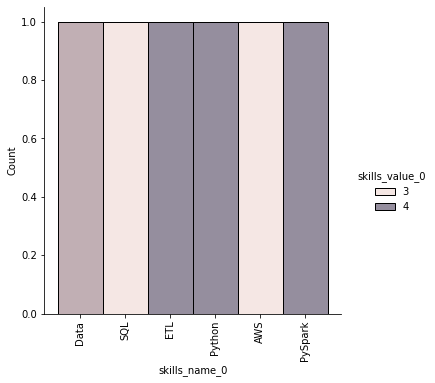

In [19]:
a=sns.displot(data = df_data,x = 'skills_name_0',hue='skills_value_0')
a.set_xticklabels(labels=['Data', 'SQL', 'ETL', 'Python', 'AWS', 'PySpark'] , rotation=90)

In [20]:
df_data['skills_name_1'].unique()

array(['Java', 'English', 'API', 'AWS', 'MariaDB', 'Microsoft Azure'],
      dtype=object)

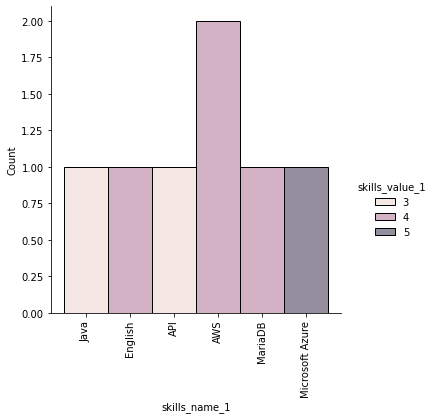

In [21]:
b=sns.displot(data = df_data,x = 'skills_name_1',hue='skills_value_1')
b.set_xticklabels(labels=['Java', 'English', 'API', 'AWS', 'MariaDB', 'Microsoft Azure'] , rotation=90)

In [22]:
df_data['skills_name_2'].unique()

array(['Automated Testing', 'Tableau', 'Excel', 'Python', 'ETL', 'MySQL',
       'Architecture'], dtype=object)

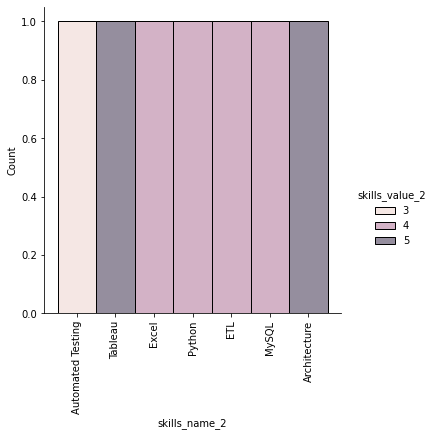

In [23]:
c=sns.displot(data = df_data,x = 'skills_name_2',hue='skills_value_2')
c.set_xticklabels(labels=['Automated Testing', 'Tableau', 'Excel', 'Python', 'ETL', 'MySQL',
       'Architecture'] , rotation=90)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37787 entries, 0 to 37786
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Title                      37787 non-null  object        
 1   City                       37787 non-null  object        
 2   Country_code               37754 non-null  object        
 3   Marker_icon                37787 non-null  object        
 4   Workplace_type             37787 non-null  object        
 5   Experience_level           37787 non-null  object        
 6   Published_at               37787 non-null  object        
 7   Remote_interview           37787 non-null  bool          
 8   Remote                     37787 non-null  bool          
 9   Open_to_hire_Ukrainians    37787 non-null  bool          
 10  Company_size_from          37787 non-null  int64         
 11  Company_size_to            37748 non-null  object        
 12  if_p

In [25]:
df = df.dropna()

## Converting columns values to numbers

In [26]:
df['if_mandate']=df['if_mandate'].astype(int)
df['Remote_interview']=df['Remote_interview'].astype(int)
df['if_b2b']=df['if_b2b'].astype(int)
df['if_permanent']=df['if_permanent'].astype(int)
df['Open_to_hire_Ukrainians']=df['Open_to_hire_Ukrainians'].astype(int)
df['Remote']=df['Remote'].astype(int)
df['Remote_interview']=df['Remote_interview'].astype(int)

In [27]:
df['City'] = pd.factorize(df['City'])[0].astype(float)
df['Country_code'] = pd.factorize(df['Country_code'])[0].astype(float)
df['Marker_icon'] = pd.factorize(df['Marker_icon'])[0].astype(float)
df['Workplace_type'] = pd.factorize(df['Workplace_type'])[0].astype(float)
df['skills_name_0'] = pd.factorize(df['skills_name_0'])[0].astype(float)
df['skills_name_1'] = pd.factorize(df['skills_name_1'])[0].astype(float)
df['skills_name_2'] = pd.factorize(df['skills_name_2'])[0].astype(float)

In [28]:
df['Experience_level'].replace(('junior','mid','senior'), (0,1,2), inplace = True)
df['Workplace_type'].replace(('office','partly_remote','remote'), (0,1,2), inplace = True)


In [29]:
new_df=df[['City','Country_code','Marker_icon','Workplace_type','Experience_level','Remote_interview','Remote','Open_to_hire_Ukrainians','Company_size_from',
           'if_permanent','if_b2b','if_mandate','skills_name_0','skills_value_0','skills_name_1','skills_value_1','skills_name_2','skills_value_2',
           'Week_Number','permanent_mean','b2b_mean','mandate_mean']] 

In [30]:
new_df.head()

,City,Country_code,Marker_icon,Workplace_type,Experience_level,Remote_interview,Remote,Open_to_hire_Ukrainians,Company_size_from,if_permanent,...,skills_name_0,skills_value_0,skills_name_1,skills_value_1,skills_name_2,skills_value_2,Week_Number,permanent_mean,b2b_mean,mandate_mean
0,0.0,0.0,0.0,0.0,2,1,1,1,0,1,...,0.0,5,0.0,5,0.0,0,30,7084.0,7084.0,0.0
1,1.0,1.0,1.0,0.0,2,1,1,1,0,1,...,1.0,3,1.0,4,1.0,4,27,7084.0,7084.0,0.0
2,2.0,2.0,1.0,0.0,2,1,1,1,0,1,...,1.0,3,1.0,4,1.0,4,22,7084.0,7084.0,0.0
3,0.0,0.0,1.0,0.0,2,1,1,1,0,1,...,1.0,3,1.0,4,1.0,4,21,7084.0,7084.0,0.0
4,3.0,2.0,2.0,0.0,1,1,1,0,0,0,...,2.0,3,2.0,4,2.0,4,26,0.0,2800.0,0.0


In [31]:
new_df=(new_df-new_df.min())/(new_df.max()-new_df.min())

In [32]:
new_df.head()

,City,Country_code,Marker_icon,Workplace_type,Experience_level,Remote_interview,Remote,Open_to_hire_Ukrainians,Company_size_from,if_permanent,...,skills_name_0,skills_value_0,skills_name_1,skills_value_1,skills_name_2,skills_value_2,Week_Number,permanent_mean,b2b_mean,mandate_mean
0,0.000000,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.000000,1.0,0.000000,1.0,0.000000,0.0,0.6,0.083341,0.272462,0.0
1,0.001751,0.017857,0.043478,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.000283,0.5,0.000343,0.8,0.000442,0.8,0.525,0.083341,0.272462,0.0
2,0.003503,0.035714,0.043478,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.000283,0.5,0.000343,0.8,0.000442,0.8,0.4,0.083341,0.272462,0.0
3,0.000000,0.000000,0.043478,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.000283,0.5,0.000343,0.8,0.000442,0.8,0.375,0.083341,0.272462,0.0
4,0.005254,0.035714,0.086957,0.0,0.5,1.0,1.0,0.0,0.0,0.0,...,0.000566,0.5,0.000687,0.8,0.000884,0.8,0.5,0.000000,0.107692,0.0


## Correlation matrix

<AxesSubplot:>

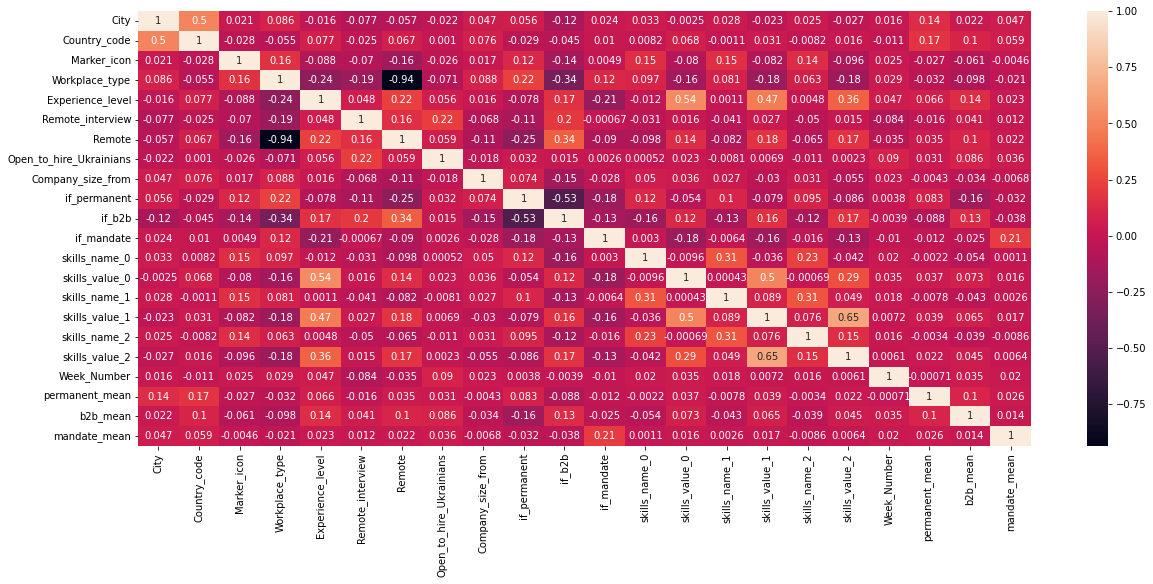

In [33]:
corr = new_df.corr()

plt.figure(figsize = (20,8))
sns.heatmap(corr,annot = True,cmap = 'rocket')

Thank you, feedback is highly appreciated! :)

Please upvote if you found this helpful 👍